# AIR QUALITY INDEX MODEL :
- DATASET : city_day.csv and city_hour.csv

In [1]:
## importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

import missingno as msno

In [2]:
df= pd.read_csv('city_day.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [3]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [4]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.drop('NH3',axis=1,inplace=True)
df.drop('Xylene',axis=1,inplace=True)
df.head(5)


,City,Date,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,NaN,NaN


In [6]:
dataset_columns = df.columns.tolist()

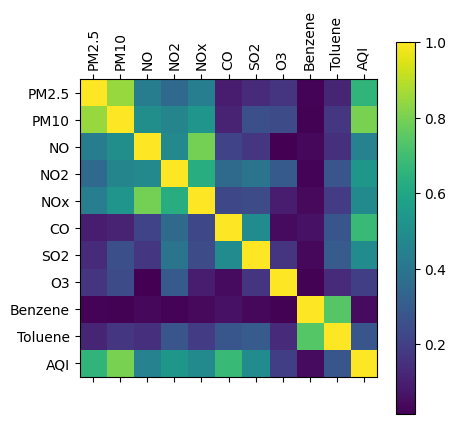

In [7]:
numeric_cols = df.select_dtypes(include=['float64'])  # This will select only the float columns

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation matrix
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,NaN,NaN


<Axes: >

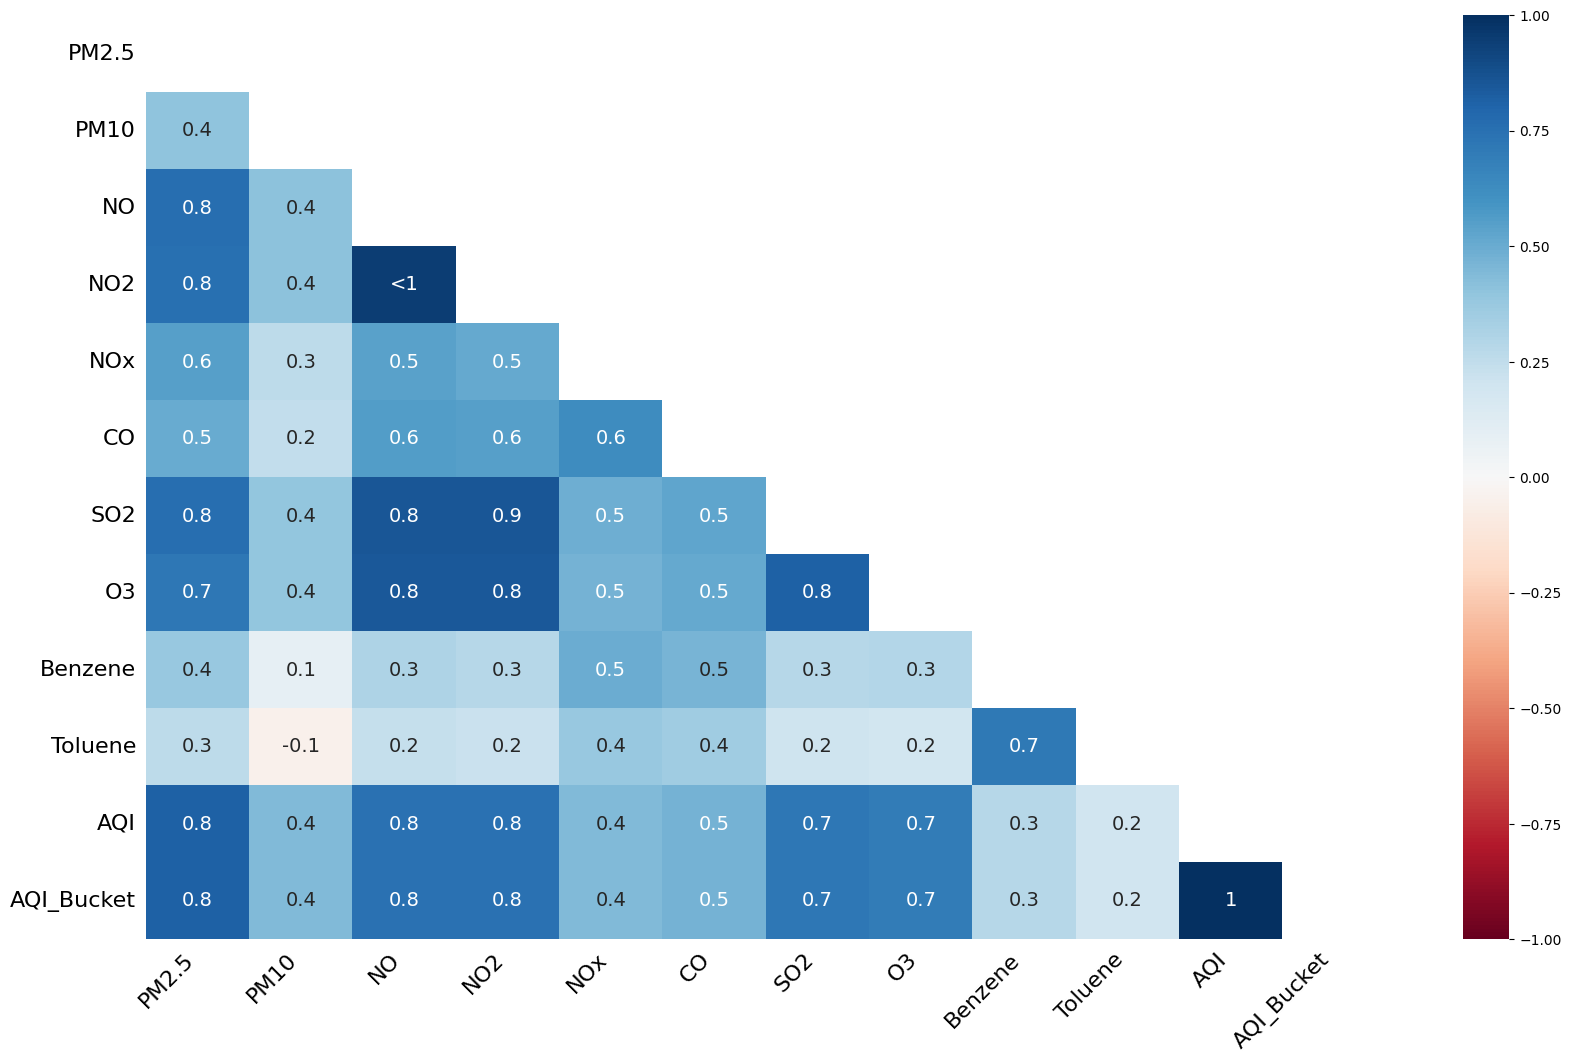

In [9]:
msno.heatmap(df)

In [10]:

features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']


<Figure size 1200x600 with 0 Axes>

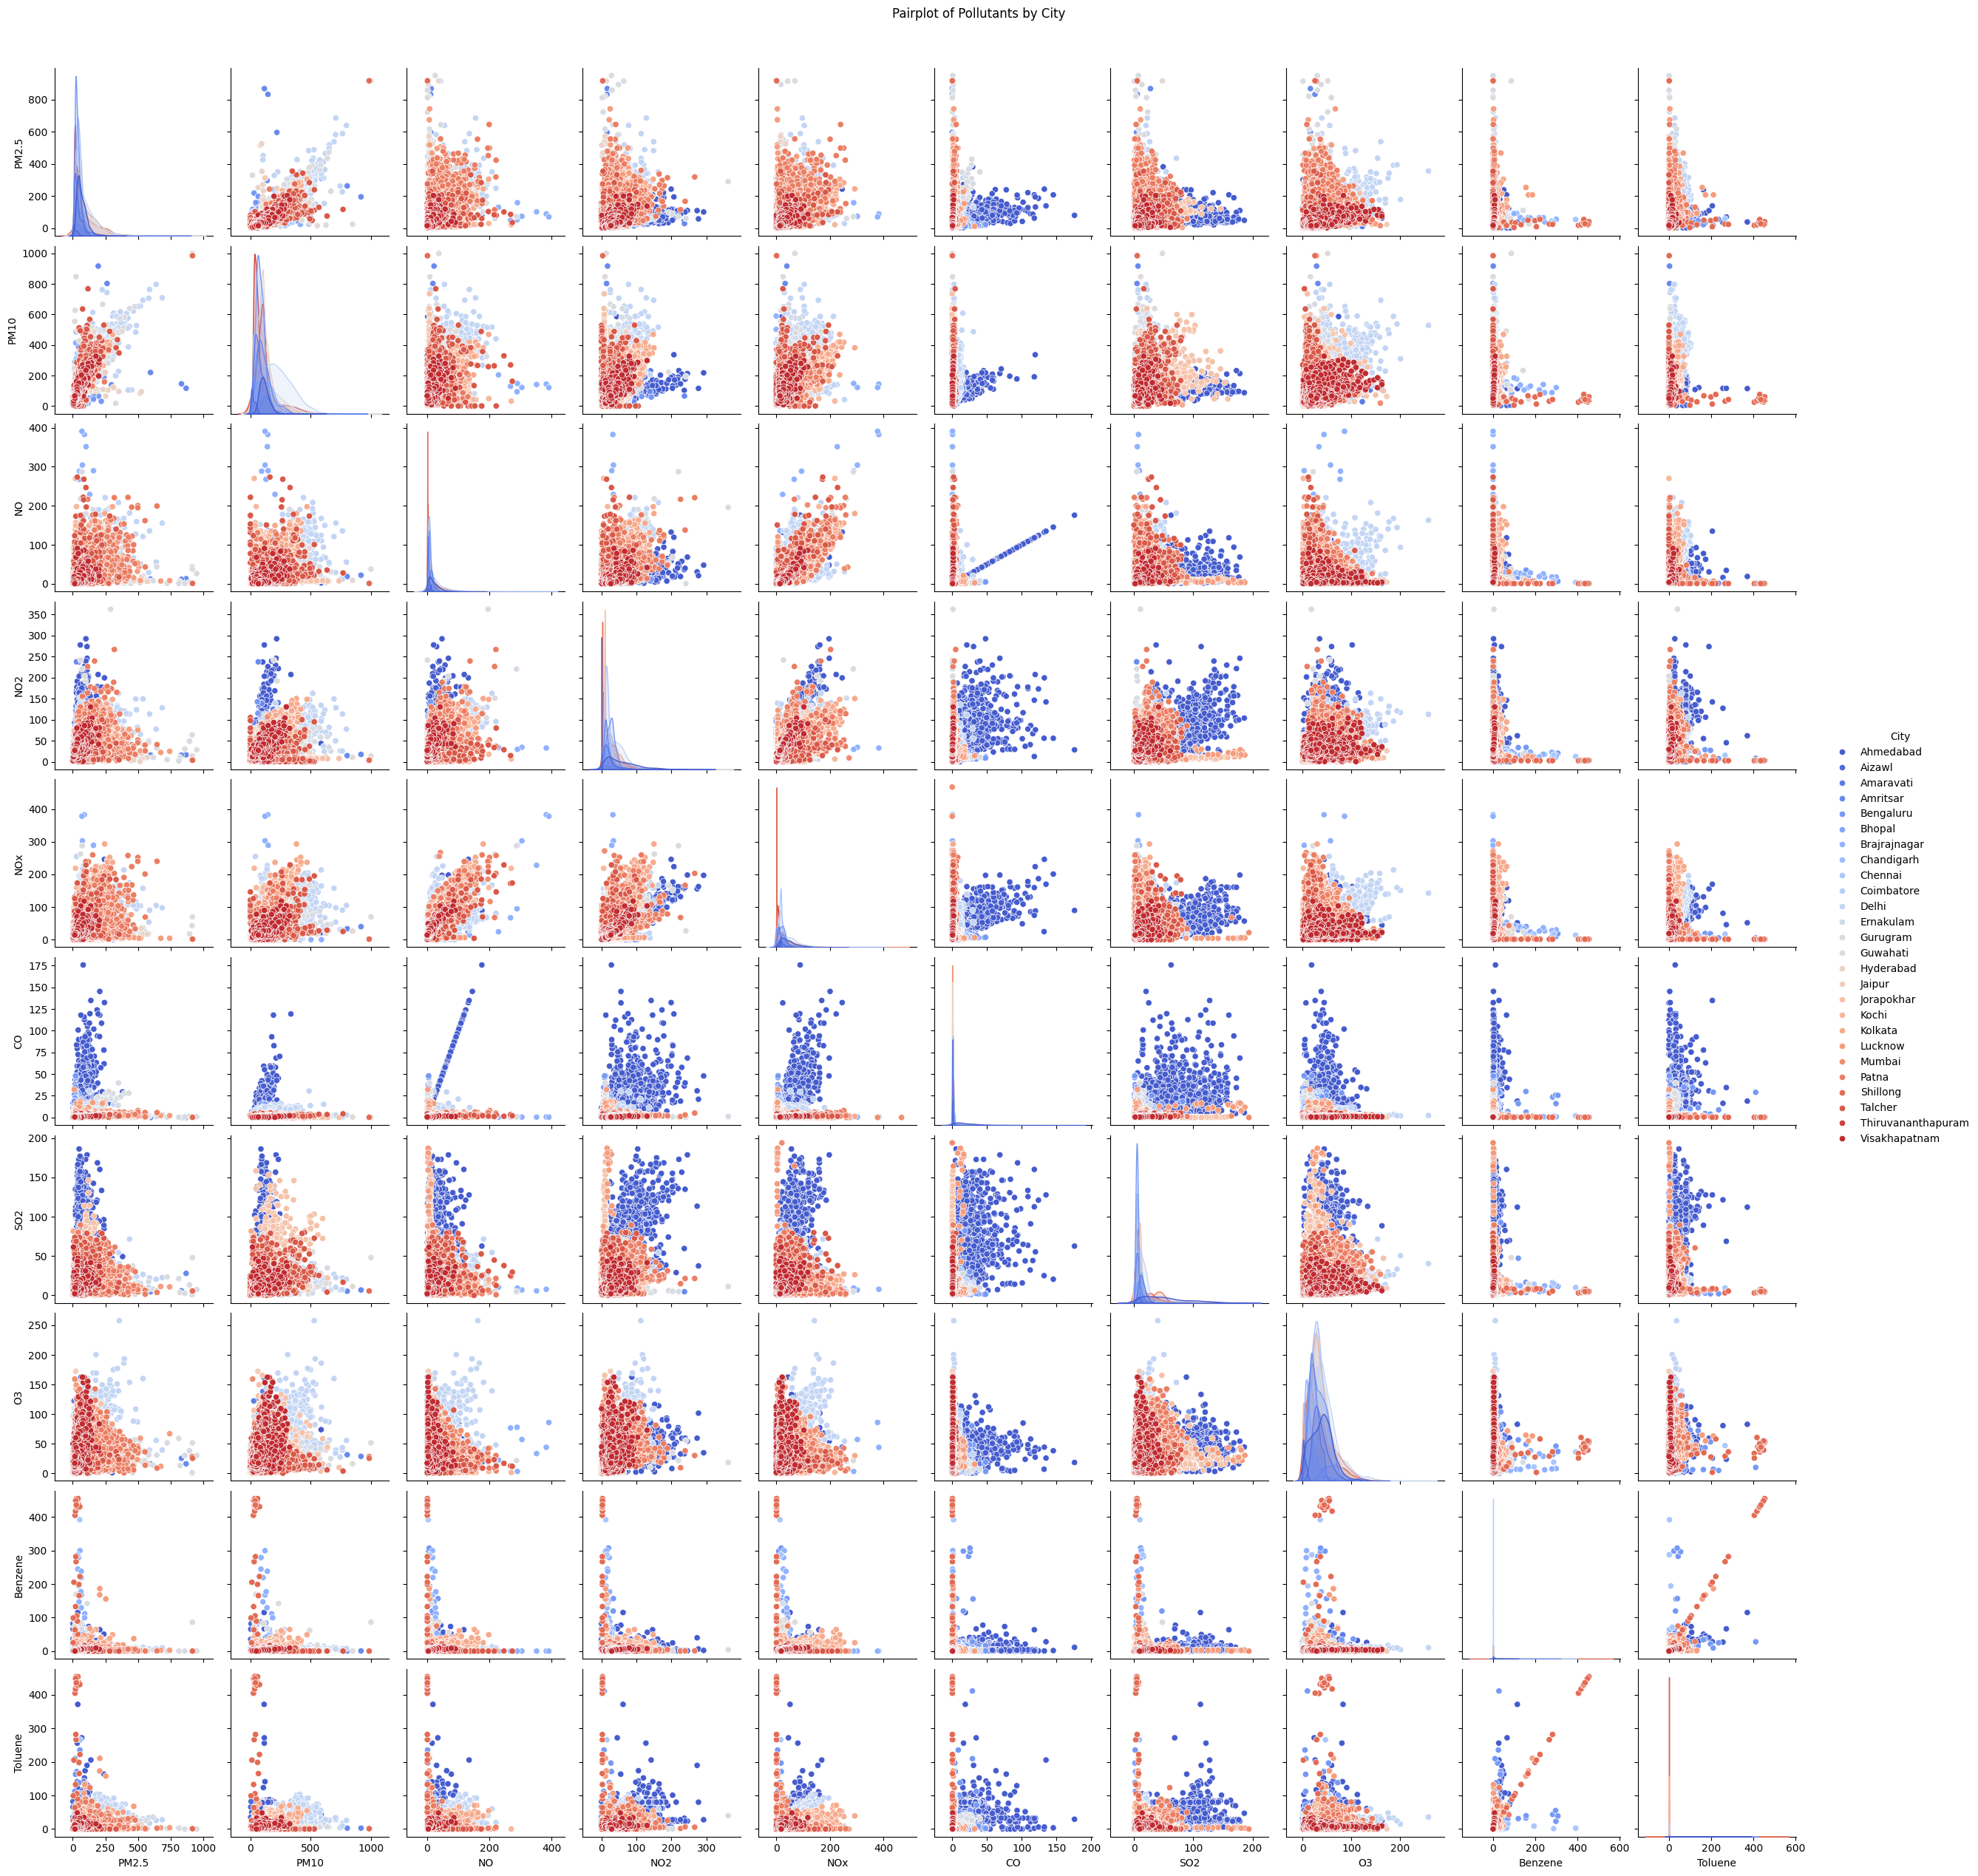

In [11]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, vars=features, hue='City', palette='coolwarm')
plt.suptitle('Pairplot of Pollutants by City', y=1.02)
plt.show()


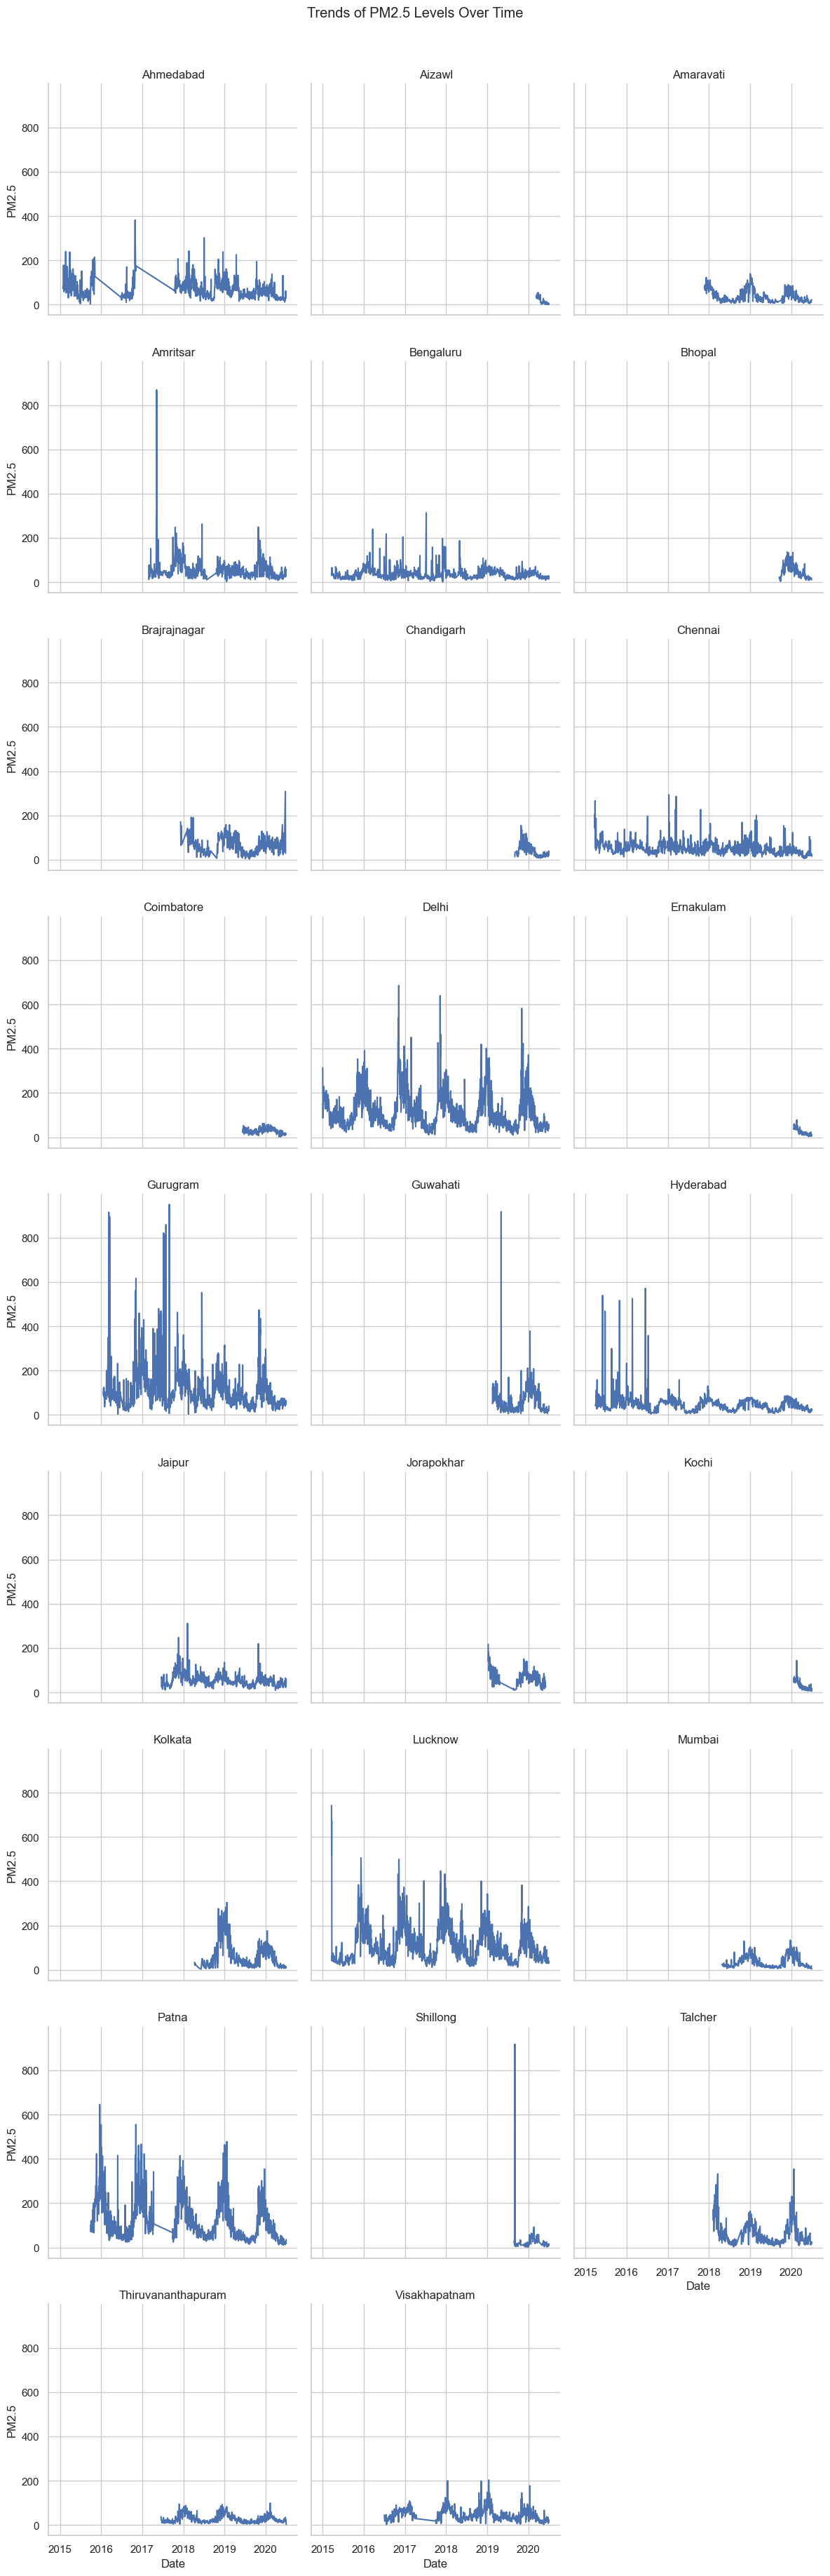

In [15]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting trends over time using faceted line plots
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col='City', col_wrap=3, height=4)
g = g.map(sns.lineplot, 'Date', 'PM2.5')
g.set_titles('{col_name}')
g.fig.suptitle('Trends of PM2.5 Levels Over Time', y=1.02)
plt.show()


In [12]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

In [13]:
df1.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,118.0,Moderate


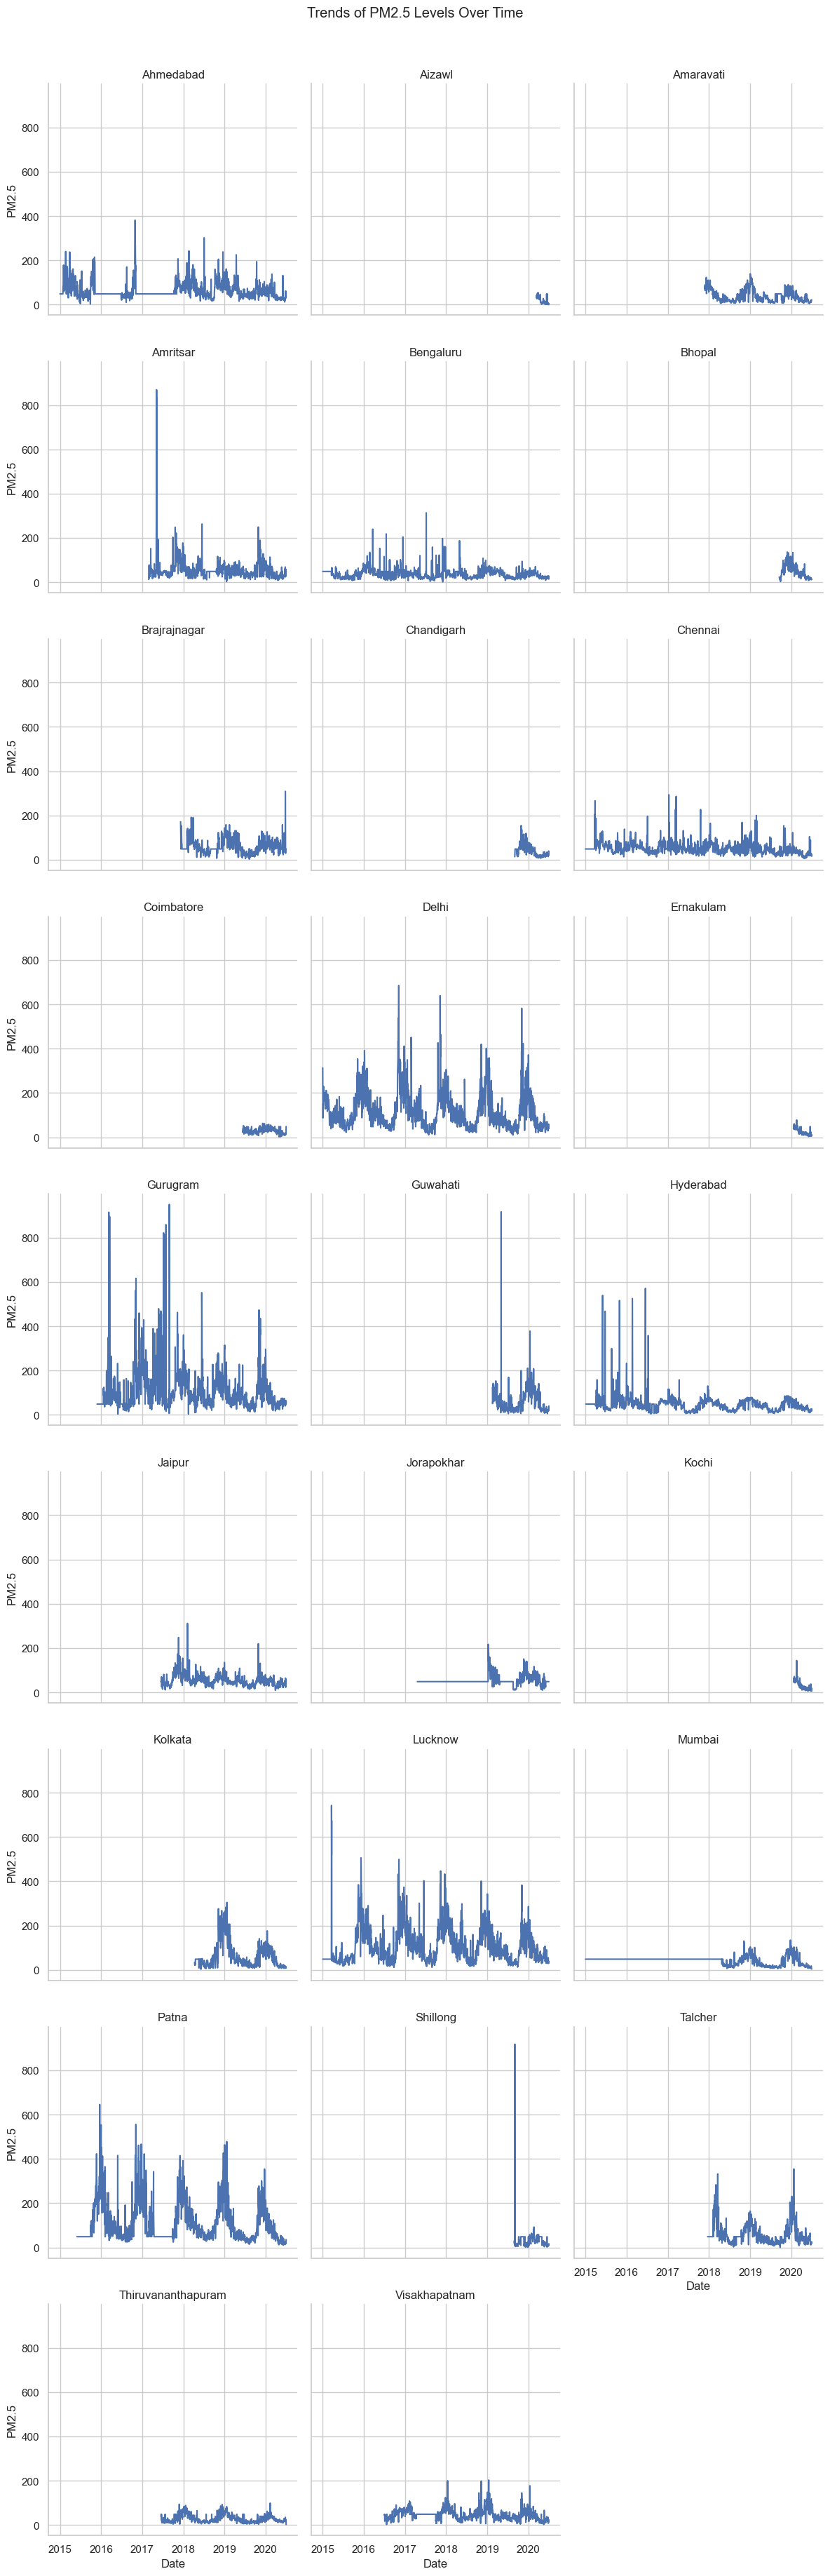

In [16]:
# Convert 'Date' to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Plotting trends over time using faceted line plots
sns.set(style="whitegrid")
g = sns.FacetGrid(df1, col='City', col_wrap=3, height=4)
g = g.map(sns.lineplot, 'Date', 'PM2.5')
g.set_titles('{col_name}')
g.fig.suptitle('Trends of PM2.5 Levels Over Time', y=1.02)
plt.show()
